# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import copy

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.
3. Perform L1 and L2 regularization on the curve obtained from step 2.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



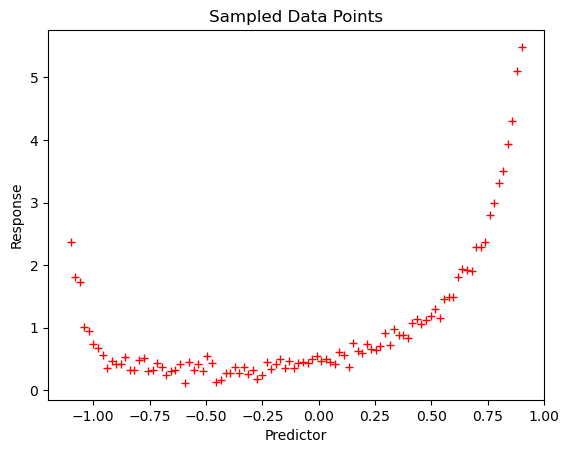

In [2]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y, coeff

predictor, response, coeffs = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

Degree - 1, error - 0.6941079921340052
Degree - 2, error - 0.16246179595329938
Degree - 3, error - 0.12309740059176347
Degree - 4, error - 0.03224841458609889
Degree - 5, error - 0.03247937996599637
Degree - 6, error - 0.01957959374455742
Degree - 7, error - 0.018882783749193638
Degree - 8, error - 0.015503266187525481
Degree - 9, error - 0.016574993760810806
Degree - 10, error - 0.01141081441817435
Degree - 11, error - 0.012749298167349035
Degree - 12, error - 0.010482411449993958
Degree - 13, error - 0.011180486501010733
Degree - 14, error - 0.00939461451693457
Degree - 15, error - 0.011729639861084589
Degree - 16, error - 0.009312417415277741
Degree - 17, error - 0.01049455340718219
Degree - 18, error - 0.01021200947915732
Degree - 19, error - 0.011959919025980027
Degree - 20, error - 0.010514106398526417
Degree - 21, error - 0.009947853010698499
Degree - 22, error - 0.011513011501475164
Degree - 23, error - 0.009854909931806386
Degree - 24, error - 0.009854445911520189
Degree - 25,

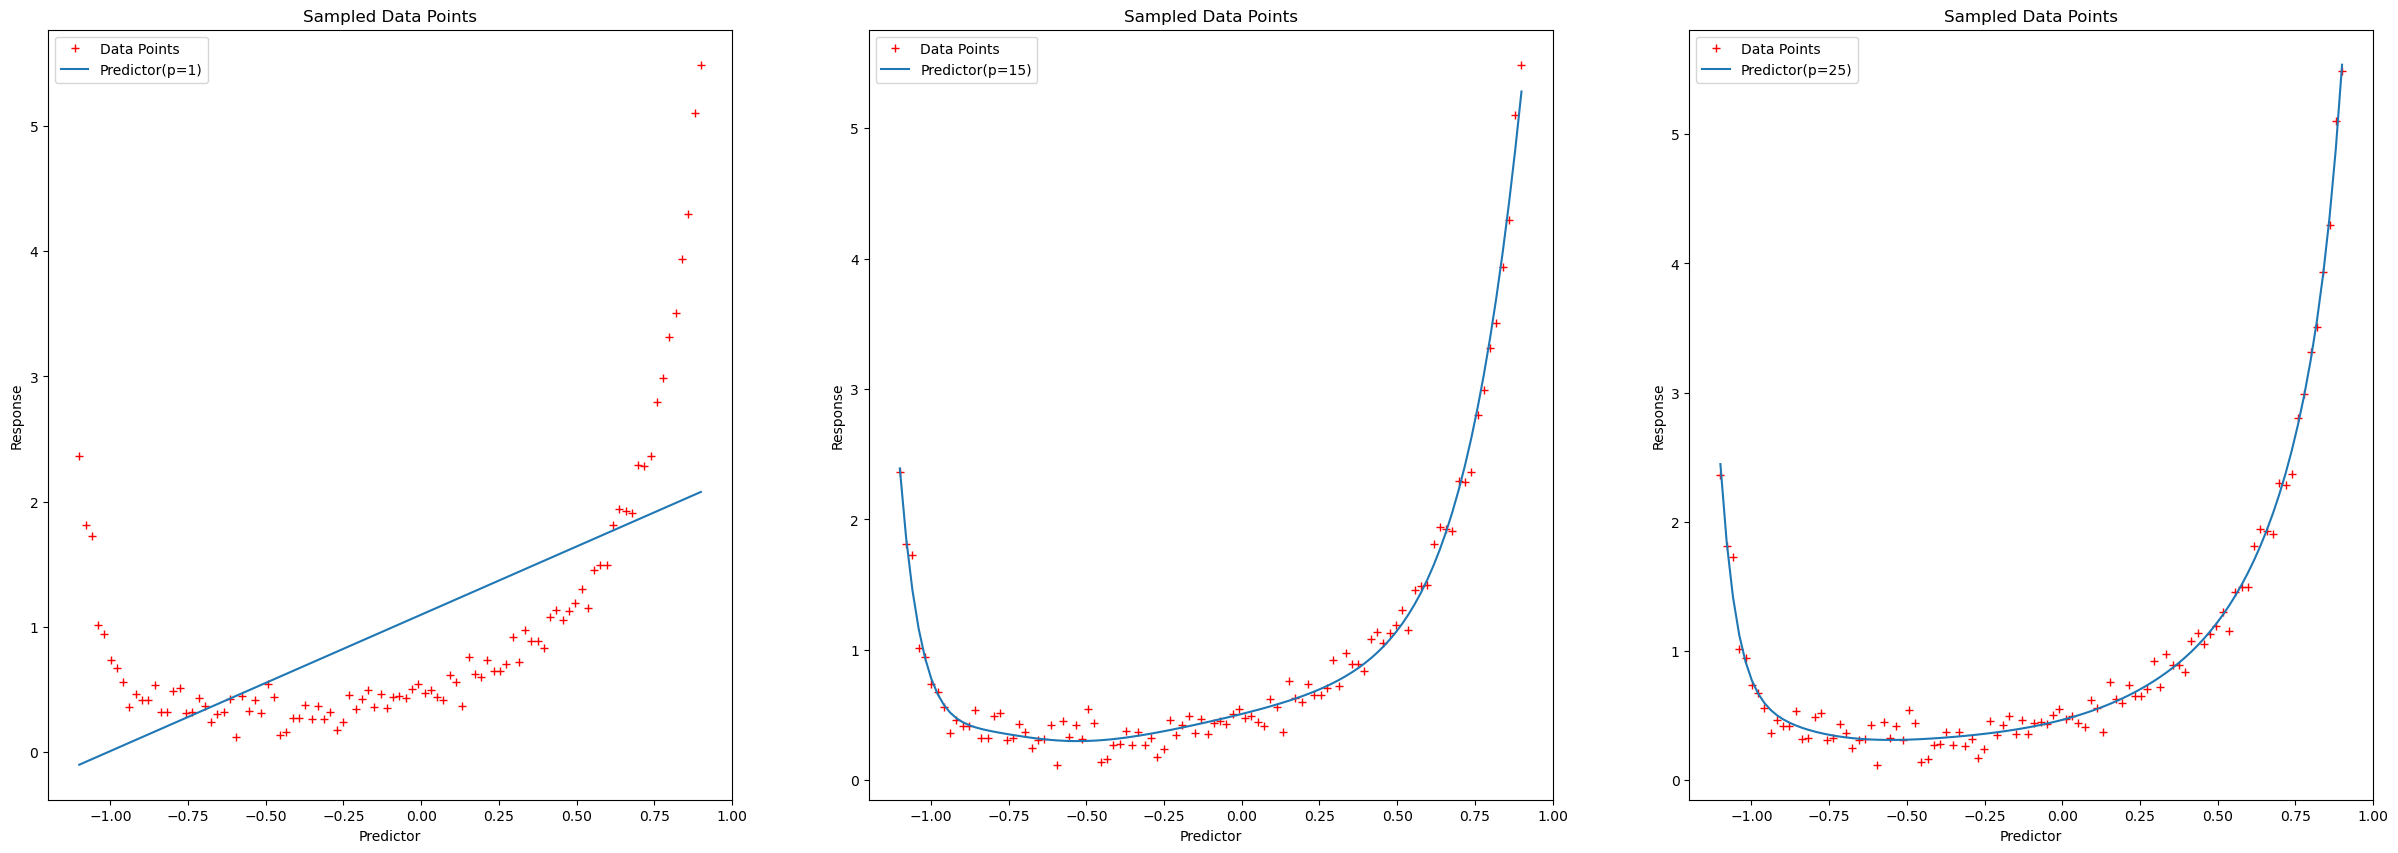

In [15]:
def reguliser(w = []):
    if l == 0:
        return 0
    if l == 2:
        return lambda_ * np.sum(w**2)
    else:
        return lambda_ * np.sum(np.abs(w))
    
def reguliser_grad(w = []):
    if l == 0:
        return np.zeros_like(w)
    if l == 2:
        return 2 * lambda_*w 
    else:
        return lambda_ * np.sign(w)
    
def mse(pred):
    return np.mean((pred - response)**2)

def grad(pred, A):
    return 2*(A.T @ (pred - response)) / len(pred)

def fit(p = 1):
    lr = 0.001
    w = np.random.randn(p+1)
    A = np.power(np.expand_dims(predictor, axis=1),np.arange(p+1))
    y_ = A @ w
    errors = [mse(y_) + reguliser(w)]
    gradient = grad(y_, A) + reguliser_grad(w)
    w -= lr*gradient
    errors.append(mse(A @ w) + reguliser(w))
    eps = 1e-08
    i = 0
    while np.abs(errors[-1] - errors[-2]) > eps:
        y_ = A @ w
        gradient = grad(y_, A) + reguliser_grad(w)
        w -= lr*gradient
        errors.append(mse(A @ w) + reguliser(w))
        i += 1
    
    return w, A @ w, errors[-1]

l = 2
lambda_ = 0
fig, axs = plt.subplots(1,3, figsize=(30,10))
i = 0
errors = []
for deg in range(1,26):
    pred_coeffs, predicted_response, error = fit(deg)
    errors.append(error)
    if(deg == 1 or deg == 15 or deg == 25):
        axs[i].plot(predictor, response, 'r+', label='Data Points')
        axs[i].plot(predictor, predicted_response, label=f"Predictor(p={deg})")
        axs[i].set_xlabel('Predictor')
        axs[i].set_ylabel('Response')
        axs[i].legend()
        axs[i].set_title('Sampled Data Points')
        i += 1
    print(f"Degree - {deg}, error - {error}")
plt.show()    

### L1 Regularisation with lambda = 0.2

Degree - 5, error - 0.8980170059527918
Degree - 10, error - 0.9351558908527473
Degree - 15, error - 1.0214954139683168
Degree - 17, error - 0.9342167073808089
Degree - 20, error - 0.9073525915661125
Degree - 25, error - 0.9107555847243998


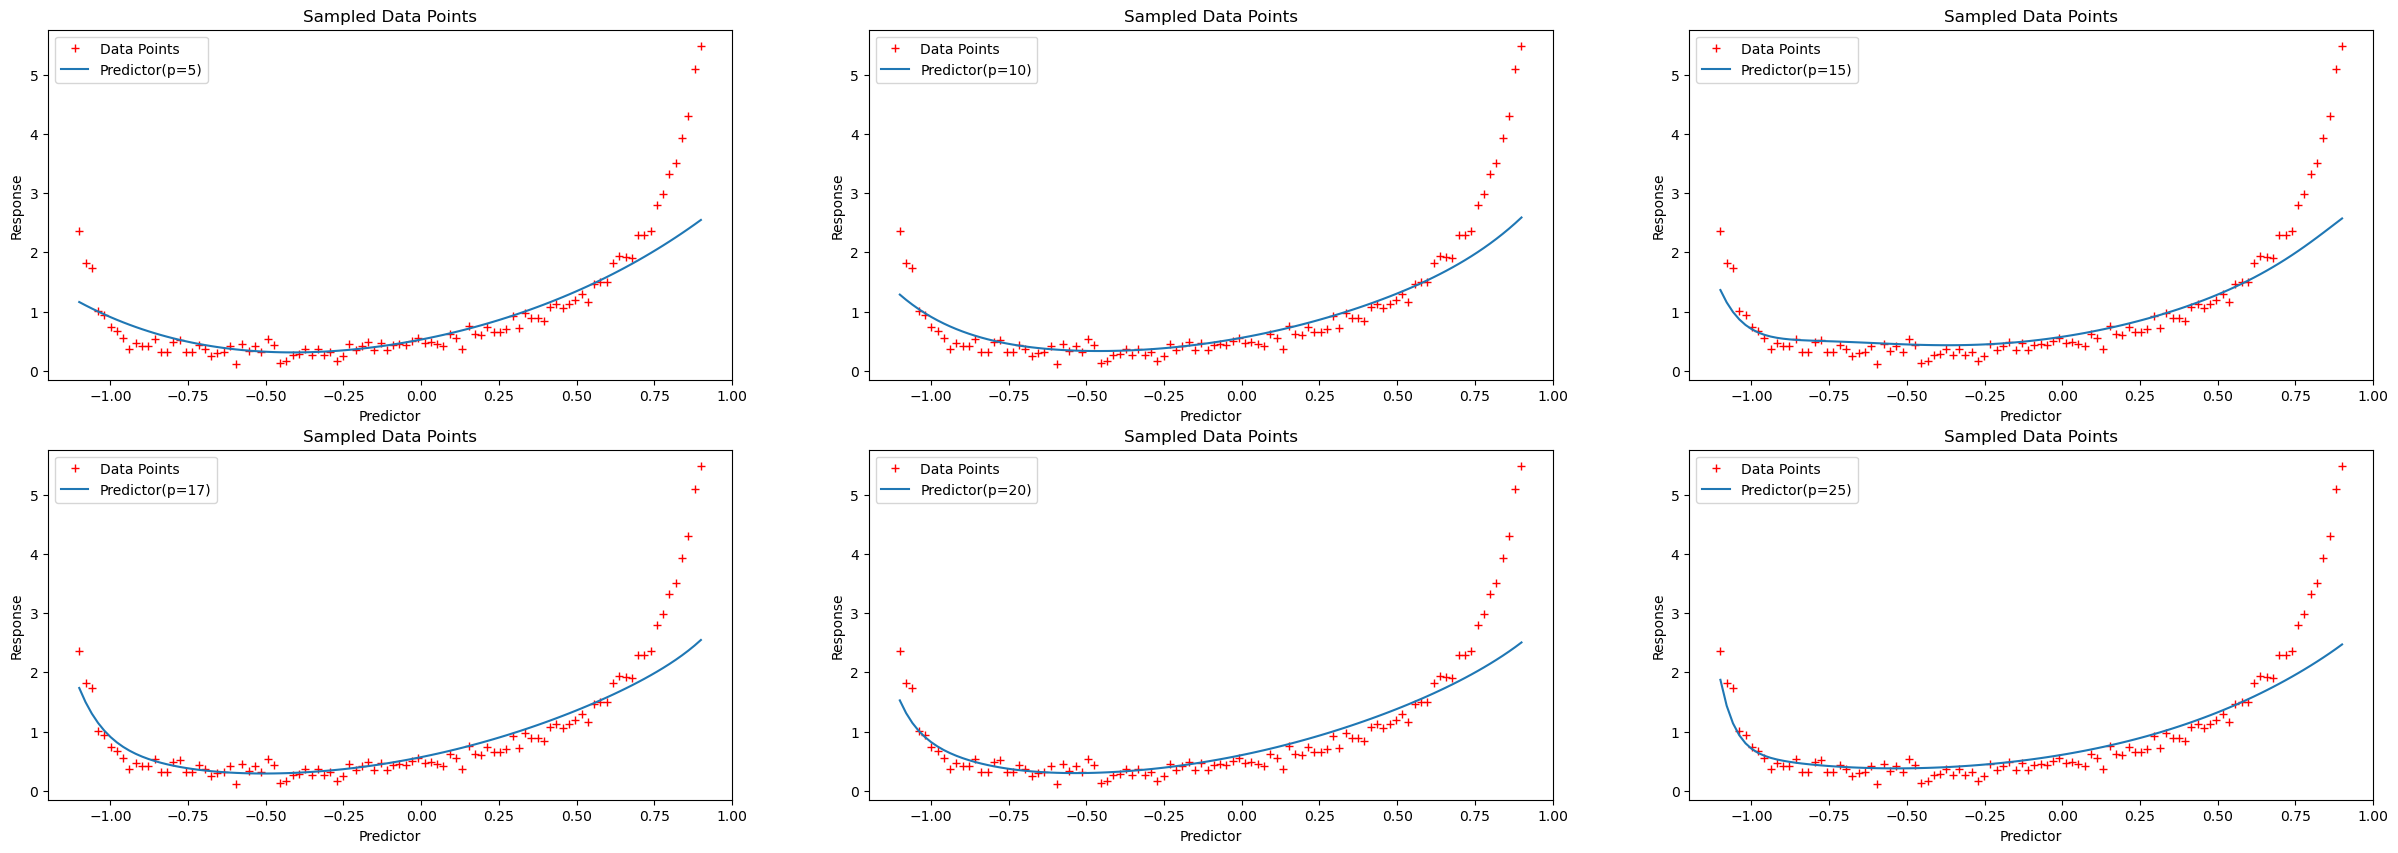

In [13]:
l = 1
lambda_ = 0.2
degrees = [5,10,15,17,20,25]
fig, axs = plt.subplots(2,3, figsize=(30,10))
i = 0
for deg in degrees:
    pred_coeffs, predicted_response, error = fit(deg)
    errors.append(error)
    axs[i//3, i%3].plot(predictor, response, 'r+', label='Data Points')
    axs[i//3, i%3].plot(predictor, predicted_response, label=f"Predictor(p={deg})")
    axs[i//3, i%3].set_xlabel('Predictor')
    axs[i//3, i%3].set_ylabel('Response')
    axs[i//3, i%3].legend()
    axs[i//3, i%3].set_title('Sampled Data Points')
    i += 1
    print(f"Degree - {deg}, error - {error}")
plt.show()    

### L2 regularisation with lambda = 0.2

Degree - 5, error - 0.7153739333760423
Degree - 10, error - 0.6260249374632283
Degree - 15, error - 0.6077835147010604
Degree - 17, error - 0.6031532456567064
Degree - 20, error - 0.598626772748732
Degree - 25, error - 0.5971213688343161


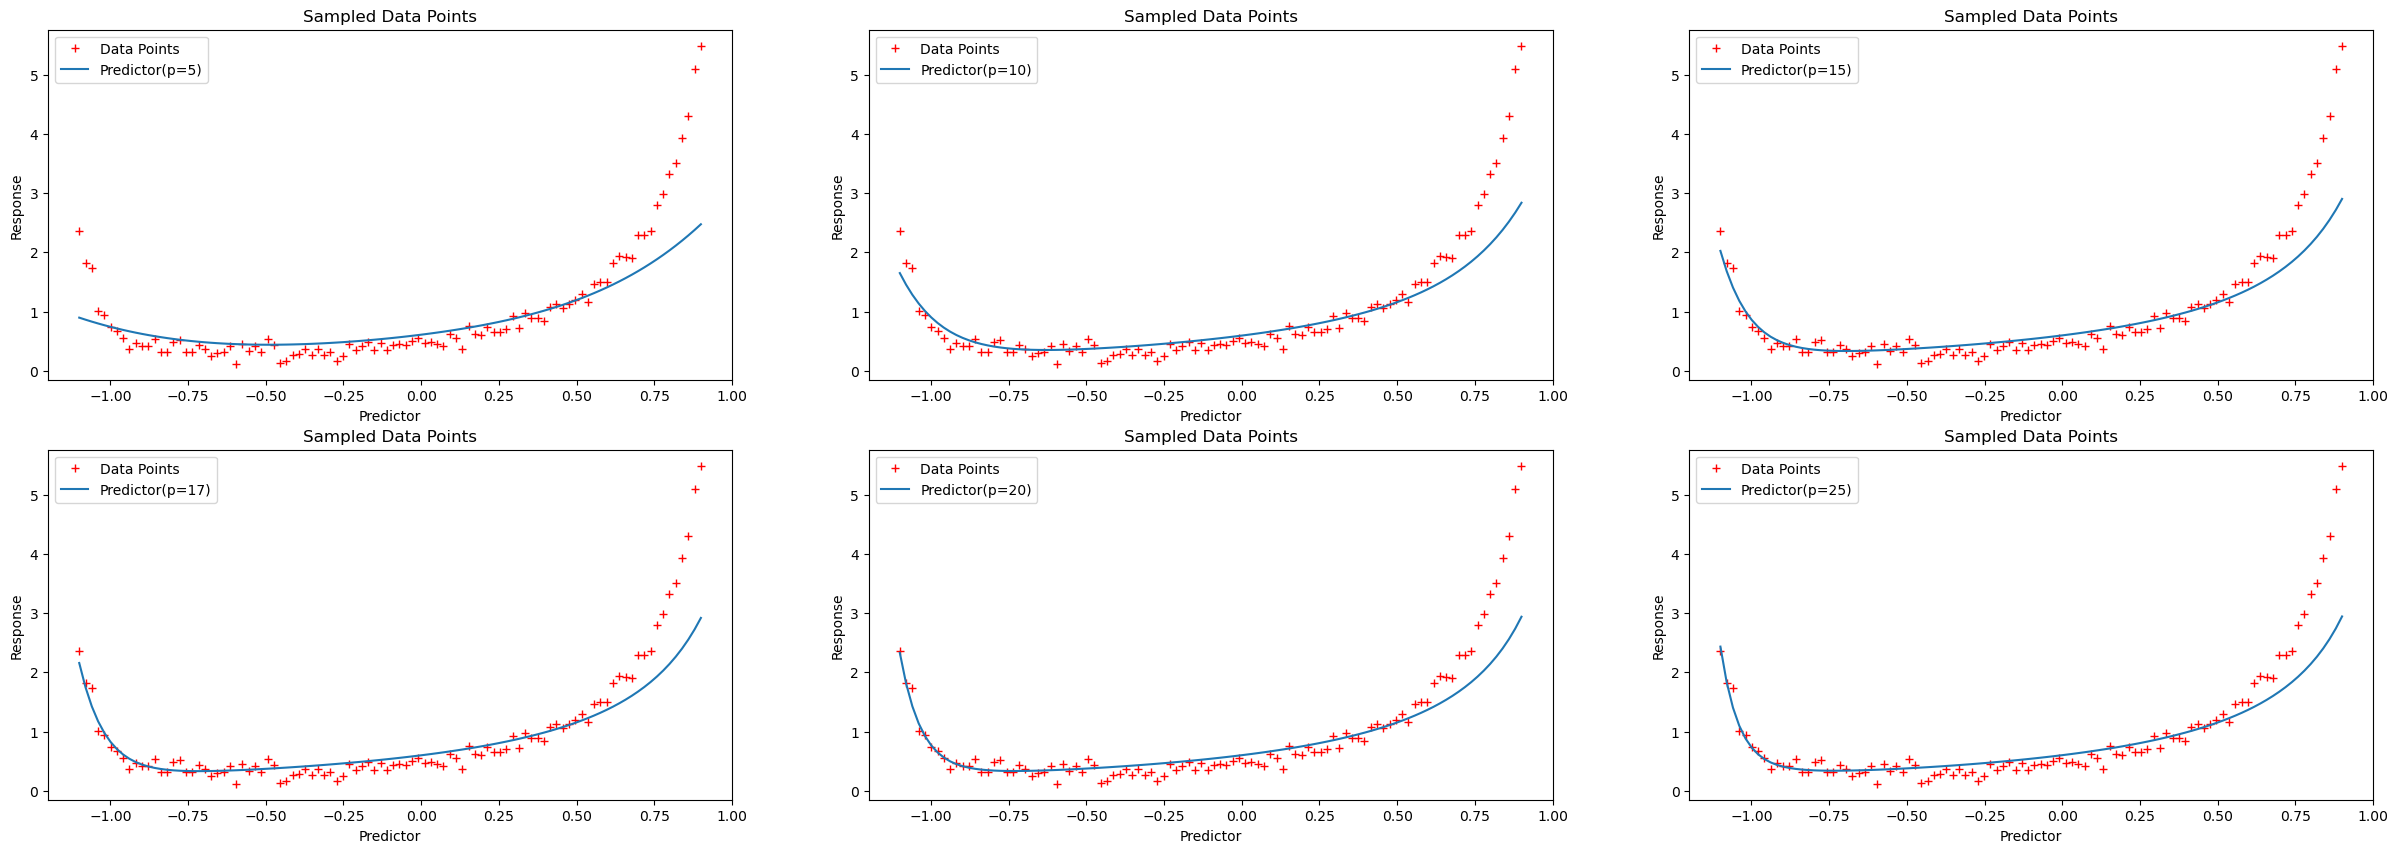

In [14]:
l = 2
lambda_ = 0.2
degrees = [5,10,15,17,20,25]
fig, axs = plt.subplots(2,3, figsize=(30,10))
i = 0
for deg in degrees:
    pred_coeffs, predicted_response, error = fit(deg)
    errors.append(error)
    axs[i//3, i%3].plot(predictor, response, 'r+', label='Data Points')
    axs[i//3, i%3].plot(predictor, predicted_response, label=f"Predictor(p={deg})")
    axs[i//3, i%3].set_xlabel('Predictor')
    axs[i//3, i%3].set_ylabel('Response')
    axs[i//3, i%3].legend()
    axs[i//3, i%3].set_title('Sampled Data Points')
    i += 1
    print(f"Degree - {deg}, error - {error}")
plt.show()    

### Errors VS Degree Plot

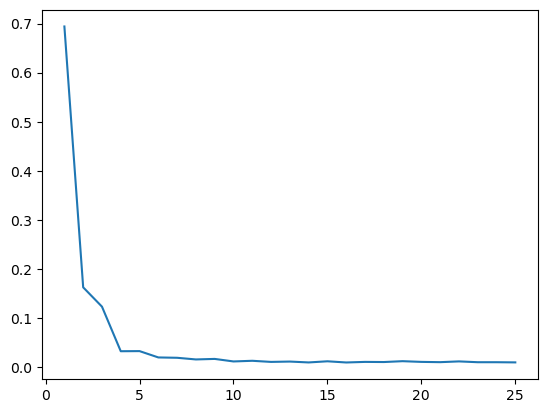

In [16]:
plt.plot(range(1,26), errors)
plt.show()
df = pd.DataFrame({'Degree': list(range(1, 26)), 'Error': errors})

In [19]:
df

,Degree,Error
0,1,0.694108
1,2,0.162462
2,3,0.123097
3,4,0.032248
4,5,0.032479
5,6,0.019580
6,7,0.018883
7,8,0.015503
8,9,0.016575
9,10,0.011411


Thus from the errors VS degree plot as well as analysing the error values we can see that for degree 13 the polynomial satisfactorily fit the curve well, thus `k = 13` can be considered a good fit

In [20]:
coeffs_df = pd.DataFrame({'Actual': coeffs,'Predicted': pred_coeffs})
coeffs_df

,Actual,Predicted
0,0.483948,0.466134
1,0.590890,0.631162
2,0.877360,1.000919
3,0.812352,0.851123
4,0.839379,0.211227
5,0.616675,0.944601
6,0.967800,2.802018
7,0.798269,0.638443
8,0.263170,-1.154723
9,0.795437,-0.263557


We can see that the some of the coefficients are matched very closely while some are not close enough

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [21]:
credit = pd.read_csv('credit.csv')
credit.head()
target = credit['Balance'].values
features = credit.iloc[:,:-1]
features

,Income,Limit,Rating,Cards,Age,Education
0,14.891,3606,283,2,34,11
1,106.025,6645,483,3,82,15
2,104.593,7075,514,4,71,11
3,148.924,9504,681,3,36,11
4,55.882,4897,357,2,68,16
...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13
396,13.364,3838,296,5,65,17
397,57.872,4171,321,5,67,12
398,37.728,2525,192,1,44,13


### Standardising the Data

In [22]:
scaler = StandardScaler()
credits = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
credits

,Income,Limit,Rating,Cards,Age,Education
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968
...,...,...,...,...,...,...
395,-0.940986,-0.275711,-0.310230,0.031032,-1.373763,-0.144171
396,-0.904963,-0.389362,-0.381413,1.491355,0.541698,1.137347
397,0.359462,-0.244913,-0.219633,1.491355,0.657787,-0.464550
398,-0.212808,-0.958916,-1.054419,-1.429291,-0.677231,-0.144171


### Running Linear Regression on the Data to find the best fit

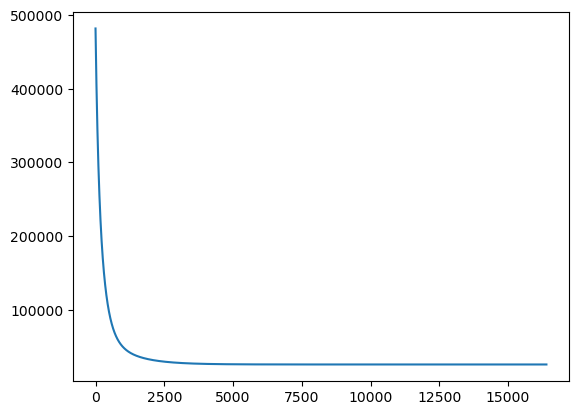

Original Error:  25672.90219374294


In [23]:
def mse(pred):
    return np.mean((pred - target)**2)

def grad(pred, A):
    return 2*(A.T @ (pred - target)) / len(pred)

def fit():
    lr = 0.001
    w = np.random.randn(credits.shape[1]+1)
    A = np.concatenate((np.array(credits),np.ones((credits.shape[0],1))), axis = 1)
    y_ = A @ w
    errors = [mse(y_)]
    gradient = grad(y_, A)
    w -= lr*gradient
    errors.append(mse(A @ w))
    eps = 1e-05
    i = 0
    while np.abs(errors[-1] - errors[-2]) > eps:
        y_ = A @ w
        gradient = grad(y_, A)
        w -= lr*gradient
        errors.append(mse(A @ w))
        i += 1
    
    return w, A @ w, errors

params, predict, error = fit()

plt.plot(range(len(error)), error)
plt.show()

print("Original Error: ", error[-1])

### Removing each column one by one and noting the change in the ERROR

In [25]:
og = copy.deepcopy(credits)
for feature in features.columns:
    credits = og.drop(feature, axis = 1)
    params, predict, error = fit()
    print(f"column - {feature}, error - {error[-1]}")

column - Income, error - 51195.11042184582
column - Limit, error - 26039.7776616647
column - Rating, error - 26112.709891514503
column - Cards, error - 25848.51973923786
column - Age, error - 25900.28671077566
column - Education, error - 25710.876535866362


We can see that removing `Income` has a much higher effect on the Error/ predictions indicating it to be the most important factor. Rest of the columns dont show much contributing effect indicating that we can get similar predictions even after removing them

### Interaction effects between Rating and Age

In [26]:
credits = og
credits['interaction'] = credits['Rating'] * credits['Age']
params, predict, error = fit()
for index, column in enumerate(credits.columns):
    print(f"Column - {column}, weight - {params[index]}")

Column - Income, weight - -264.9777136438759
Column - Limit, weight - 303.87102338714215
Column - Rating, weight - 305.4667925671988
Column - Cards, weight - 15.99892428095971
Column - Age, weight - -15.110302746387353
Column - Education, weight - 6.068227251220014
Column - interaction, weight - -5.813833153416695


Since the coefficient of interaction is < 0, it indicates that the interaction effects between `Rating` and `Age` are not strong and in opposite direction i.e if Rating Increases, the Effect of Age on the Target Variable will decrease and vice-versa

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [32]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()
target = sharks['SharkAttacks'].values
features = sharks.loc[:,['Year','Month','Temperature','IceCreamSales']]
features

,Year,Month,Temperature,IceCreamSales
0,2008,1,11.900000,76
1,2008,2,15.200000,79
2,2008,3,17.200000,91
3,2008,4,18.500000,95
4,2008,5,19.400000,103
...,...,...,...,...
79,2014,8,23.744268,101
80,2014,9,23.585229,78
81,2014,10,17.719383,94
82,2014,11,16.472557,72


### Standardizing Data

In [33]:
sharks_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

### Running Linear Regression Model on the Data with IceCreamSales included

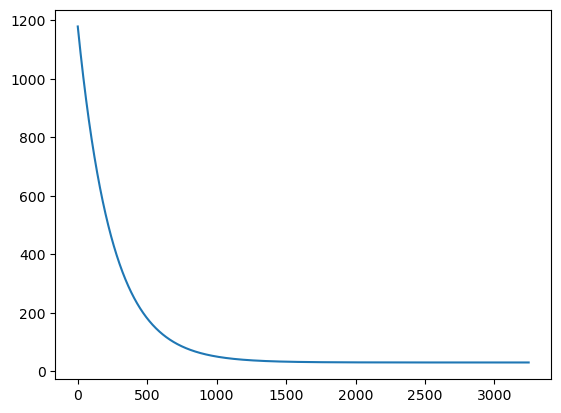

With IceCreamSales Error:  30.28917400174408
Weight Associated with IceCreamSales feature:  2.6747600183704936


In [34]:
def mse(pred):
    return np.mean((pred - target)**2)

def grad(pred, A):
    return 2*(A.T @ (pred - target)) / len(pred)

def fit():
    lr = 0.001
    w = np.random.randn(sharks_features.shape[1]+1)
    A = np.concatenate((np.array(sharks_features),np.ones((sharks_features.shape[0],1))), axis = 1)
    y_ = A @ w
    errors = [mse(y_)]
    gradient = grad(y_, A)
    w -= lr*gradient
    errors.append(mse(A @ w))
    eps = 1e-05
    i = 0
    while np.abs(errors[-1] - errors[-2]) > eps:
        y_ = A @ w
        gradient = grad(y_, A)
        w -= lr*gradient
        errors.append(mse(A @ w))
        i += 1
    
    return w, A @ w, errors

params, predict, error = fit()

plt.plot(range(len(error)), error)
plt.show()

print("With IceCreamSales Error: ", error[-1])
print("Weight Associated with IceCreamSales feature: " ,params[3])

### Running Linear Regression Model on the Data with IceCreamSales exluded

In [30]:
sharks_features.drop('IceCreamSales', axis = 1, inplace=True)

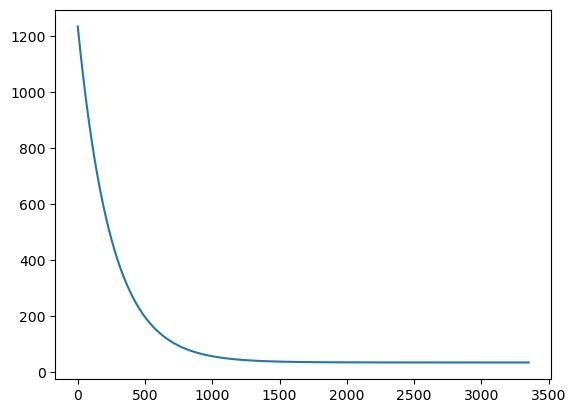

Without IceCreamSales Error:  33.544929140358484


In [31]:
params, predict, error = fit()

plt.plot(range(len(error)), error)
plt.show()

print("Without IceCreamSales Error: ", error[-1])

Since the weight Associated with `IceCreamSales` is > 0, there is positive correlation between `Shark Attacks`( target) and the `IceCreamSales` feature, however even after removing the `IceCreamSales` the MSE doesnt change much hence the predictions remain almost the same, thus we conclude that Correlation between Variables doesnt always mean Causation too

In [43]:
correlation = (sharks_features['IceCreamSales']).corr(sharks_features['Temperature'])
print(correlation)

0.5957694253763232


Thus the correlation coefficient between Temparature and IceCreamSales indicated a positive relation between them, conveying that a pausible reason for the correlation between Shark Attacks and IceCreamSales could be through Temperature